In [17]:
import pandas as pd

In [18]:
import json
from pandas.io.json import json_normalize

In [19]:
wb_df_1 = pd.read_json('data/world_bank_projects.json')

In [20]:
print(wb_df_1.head())

                                      _id  approvalfy board_approval_month  \
0  {u'$oid': u'52b213b38594d8a2be17c780'}        1999             November   
1  {u'$oid': u'52b213b38594d8a2be17c781'}        2015             November   
2  {u'$oid': u'52b213b38594d8a2be17c782'}        2014             November   
3  {u'$oid': u'52b213b38594d8a2be17c783'}        2014              October   
4  {u'$oid': u'52b213b38594d8a2be17c784'}        2014              October   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   
3  2013-10-31T00:00:00Z   MIN. OF PLANNING AND INT'L COOPERATION   
4  2013-10-31T00:00:00Z                      MINISTRY OF FINANCE   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Repub

In [50]:
wb_df_1.shape


(500, 50)

In [51]:
wb_df_2 = wb_df_1[['country_namecode', '_id']]
wb_df_3 = wb_df_2.groupby('country_namecode').count()

In [52]:
sorted_by_country = wb_df_3.sort_values('_id', ascending=False)
sorted_by_country.columns=['no. of projects']


In [53]:
sorted_by_country = sorted_by_country.reset_index()
sorted_by_country.head(10)


,country_namecode,no. of projects
0,People's Republic of China!$!CN,19
1,Republic of Indonesia!$!ID,19
2,Socialist Republic of Vietnam!$!VN,17
3,Republic of India!$!IN,16
4,Republic of Yemen!$!RY,13
5,People's Republic of Bangladesh!$!BD,12
6,Nepal!$!NP,12
7,Kingdom of Morocco!$!MA,12
8,Republic of Mozambique!$!MZ,11
9,Africa!$!3A,11


In [54]:
common_projects = wb_df_1[['_id', 'mjtheme_namecode']].dropna()
common_projects.head(10)


,_id,mjtheme_namecode
0,{u'$oid': u'52b213b38594d8a2be17c780'},"[{u'code': u'8', u'name': u'Human development'..."
1,{u'$oid': u'52b213b38594d8a2be17c781'},"[{u'code': u'1', u'name': u'Economic managemen..."
2,{u'$oid': u'52b213b38594d8a2be17c782'},"[{u'code': u'5', u'name': u'Trade and integrat..."
3,{u'$oid': u'52b213b38594d8a2be17c783'},"[{u'code': u'7', u'name': u'Social dev/gender/..."
4,{u'$oid': u'52b213b38594d8a2be17c784'},"[{u'code': u'5', u'name': u'Trade and integrat..."
5,{u'$oid': u'52b213b38594d8a2be17c785'},"[{u'code': u'6', u'name': u'Social protection ..."
6,{u'$oid': u'52b213b38594d8a2be17c786'},"[{u'code': u'2', u'name': u'Public sector gove..."
7,{u'$oid': u'52b213b38594d8a2be17c787'},"[{u'code': u'11', u'name': u'Environment and n..."
8,{u'$oid': u'52b213b38594d8a2be17c788'},"[{u'code': u'10', u'name': u'Rural development..."
9,{u'$oid': u'52b213b38594d8a2be17c789'},"[{u'code': u'2', u'name': u'Public sector gove..."


In [55]:
common_projects['mjtheme_namecode'] = common_projects['mjtheme_namecode'].astype(str)
common_projects_grouped = common_projects.groupby('mjtheme_namecode').count()
common_projects_sorted = common_projects_grouped.sort_values('_id', ascending=False)
common_projects_sorted[['_id']].head(50)

,_id
mjtheme_namecode,
"[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u'Environment and natural resources management'}]",12
"[{u'code': u'8', u'name': u'Human development'}, {u'code': u'11', u'name': u''}]",11
"[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]",8
"[{u'code': u'4', u'name': u'Financial and private sector development'}, {u'code': u'4', u'name': u'Financial and private sector development'}]",6
"[{u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'2', u'name': u'Public sector governance'}, {u'code': u'2', u'name': u'Public sector governance'}]",6
"[{u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}, {u'code': u'8', u'name': u'Human development'}]",5
"[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'4', u'name': u''}]",5
"[{u'code': u'4', u'name': u'Financial and private sector development'}, {u'code': u'5', u'name': u'Trade and integration'}]",5
"[{u'code': u'11', u'name': u'Environment and natural resources management'}, {u'code': u'11', u'name': u''}]",5


In [56]:
import re

In [57]:
common_projects['themes'] = common_projects['mjtheme_namecode'].astype(str)
common_projects['codes1'] = common_projects['themes'].str.extract('([0-9]+)', expand=True)
common_projects['theme_names1'] = common_projects['themes'].str.extract(r'([A-Z]\D+\')', expand=True)
common_projects['codes2'] = common_projects['themes'].str.extract('(\s\{\D+[0-9]+)', expand=True)
#common_projects['theme_names2'] = common_projects['themes'].str.extract('([?name: u]\D+[A-Z]\D+z})', expand=True)
common_projects['codes3'] = common_projects['codes2'].str.extract('([0-9]+)', expand=True)
#wb_df_1['mjtheme_namecode'].iloc[478]
common_projects.head(20)
    

,_id,mjtheme_namecode,themes,codes1,theme_names1,codes2,codes3
0,{u'$oid': u'52b213b38594d8a2be17c780'},"[{u'code': u'8', u'name': u'Human development'...","[{u'code': u'8', u'name': u'Human development'...",8,"Human development'}, {u'code': u'",{u'code': u'11,11
1,{u'$oid': u'52b213b38594d8a2be17c781'},"[{u'code': u'1', u'name': u'Economic managemen...","[{u'code': u'1', u'name': u'Economic managemen...",1,"Economic management'}, {u'code': u'",{u'code': u'6,6
2,{u'$oid': u'52b213b38594d8a2be17c782'},"[{u'code': u'5', u'name': u'Trade and integrat...","[{u'code': u'5', u'name': u'Trade and integrat...",5,"Trade and integration'}, {u'code': u'",{u'code': u'2,2
3,{u'$oid': u'52b213b38594d8a2be17c783'},"[{u'code': u'7', u'name': u'Social dev/gender/...","[{u'code': u'7', u'name': u'Social dev/gender/...",7,"Social dev/gender/inclusion'}, {u'code': u'",{u'code': u'7,7
4,{u'$oid': u'52b213b38594d8a2be17c784'},"[{u'code': u'5', u'name': u'Trade and integrat...","[{u'code': u'5', u'name': u'Trade and integrat...",5,"Trade and integration'}, {u'code': u'",{u'code': u'4,4
5,{u'$oid': u'52b213b38594d8a2be17c785'},"[{u'code': u'6', u'name': u'Social protection ...","[{u'code': u'6', u'name': u'Social protection ...",6,"Social protection and risk management'}, {u'co...",{u'code': u'6,6
6,{u'$oid': u'52b213b38594d8a2be17c786'},"[{u'code': u'2', u'name': u'Public sector gove...","[{u'code': u'2', u'name': u'Public sector gove...",2,"Public sector governance'}, {u'code': u'",{u'code': u'4,4
7,{u'$oid': u'52b213b38594d8a2be17c787'},"[{u'code': u'11', u'name': u'Environment and n...","[{u'code': u'11', u'name': u'Environment and n...",11,Environment and natural resources management'}...,{u'code': u'8,8
8,{u'$oid': u'52b213b38594d8a2be17c788'},"[{u'code': u'10', u'name': u'Rural development...","[{u'code': u'10', u'name': u'Rural development...",10,"Rural development'}, {u'code': u'",{u'code': u'7,7
9,{u'$oid': u'52b213b38594d8a2be17c789'},"[{u'code': u'2', u'name': u'Public sector gove...","[{u'code': u'2', u'name': u'Public sector gove...",2,"Public sector governance'}, {u'code': u'",{u'code': u'2,2


In [58]:
themes_dict = {}


In [59]:
ec = themes['mjtheme_namecode'].str.contains("u'3'")
ec

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
470   NaN
471   NaN
472   NaN
473   NaN
474   NaN
475   NaN
476   NaN
477   NaN
478   NaN
479   NaN
480   NaN
481   NaN
482   NaN
483   NaN
484   NaN
485   NaN
486   NaN
487   NaN
488   NaN
489   NaN
490   NaN
491   NaN
492   NaN
493   NaN
494   NaN
495   NaN
496   NaN
497   NaN
498   NaN
499   NaN
Name: mjtheme_namecode, dtype: float64

In [86]:
themes = wb_df_1['mjtheme_namecode'].astype(str)
themes_list = ['Social protection', 'Social dev','Rural', 'Economic', 'Financial', 'Trade', 'Environment', 'Human', 'Public', 'Urban', 'Rule of law']
themes_code = ["u'6'", "u'7'", "u'10'", "u'1'", "u'4'", "u'5'", "u'11'", "u'8'", "u'2'", "u'9'", "u'3'"]
themes_count = []
codes_count = []

for item in themes_list:
    x= themes.str.contains(item).sum()
    themes_count.append(x)
print(themes_count)
for code in themes_code:
    y = themes.str.contains(code).sum()
    codes_count.append(y)
print(codes_count)


[110, 103, 135, 28, 104, 56, 135, 118, 126, 37, 11]
[116, 114, 148, 33, 119, 61, 157, 128, 140, 40, 14]


In [87]:
indx = range(10)
th = list(zip(indx, (themes_list, themes_count, themes_code, codes_count)))
th_dict = dict(th)
th_dict
th_df = pd.DataFrame(th_dict)
th_df = th_df.rename(columns = {0:'Theme_name', 1:'Counts_by_name', 2:'Theme_code', 3:'Counts_by_code'})
th_df=th_df.sort_values('Counts_by_code', ascending=False).reset_index(drop=True)
th_df

,Theme_name,Counts_by_name,Theme_code,Counts_by_code
0,Environment,135,u'11',157
1,Rural,135,u'10',148
2,Public,126,u'2',140
3,Human,118,u'8',128
4,Financial,104,u'4',119
5,Social protection,110,u'6',116
6,Social dev,103,u'7',114
7,Trade,56,u'5',61
8,Urban,37,u'9',40
9,Economic,28,u'1',33


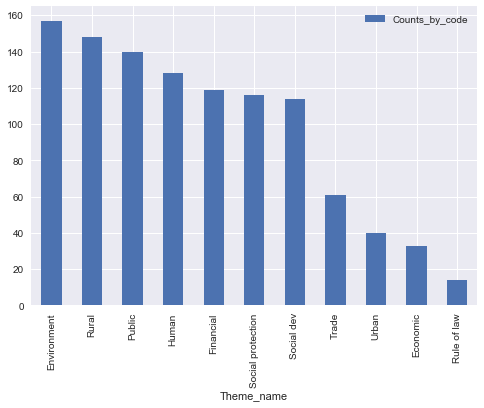

In [93]:
import matplotlib.pyplot as plt
th_df.plot(kind='bar', x='Theme_name', y='Counts_by_code')

plt.show()